# QA sheet

In [96]:
%matplotlib nbagg

import sys 
import MySQLdb
import pandas as pd 
import matplotlib.pyplot as plt

from Trax.Utils.Conf.Configuration import Config
from KPIUtils_v2.DB.PsProjectConnector import PSProjectConnector
from Trax.Cloud.Services.Connector.Keys import DbUsers

Config.init(app_name=' ', config_file='/home/Ilan/dev/theGarageForPs/Trax/Apps/Services/KEngine/k-engine-prod.config')
Config.PROD 




'prod'

#### connectors and queries 

In [97]:
connector = PSProjectConnector('diageous', DbUsers.CalculationEng)
static = '''SELECT * FROM  static.kpi_level_2'''
static_kpi = data = pd.read_sql_query(static, connector.db)
results = '''SELECT * FROM report.kpi_level_2_results'''
kpi_results = data = pd.read_sql_query(results, connector.db)
connector.disconnect_rds()



Log was not initialized - Unable to access vault while running in dev environment. (extra=None)
Log was not initialized - Unable to access vault while running in dev environment. (extra=None)
Log was not initialized - Unable to access vault while running in dev environment. (extra=None)
Log was not initialized - Deprecated usage of secret_keys file for username!!! (extra=None)
Log was not initialized - Deprecated usage of secret_keys file for password!!! (extra=None)
Log was not initialized - Credentials are updated from secret_keys configuration file! Application name:  . Mongo name: Smart (extra=None)
Log was not initialized - Open connection to SmartDev db. (extra=None)
Log was not initialized - Closed connection to SmartDev db. (extra=None)


## test1 - Find uncalculated KPI 

In [216]:


kpi_results2 = static_kpi.merge(kpi_results, left_on='pk' ,right_on='kpi_level_2_fk', how='left')
kpi_results2 = kpi_results2.loc[kpi_results2['kpi_calculation_stage_fk'] == 3] # .groupby(by=['session_fk','client_name']).count()
kpi_results2[kpi_results2.isnull().result].client_name




1788930           Assortment on Trade
1788931     Assortment on Trade - SKU
1788932          Assortment off Trade
1788933    Assortment off Trade - SKU
Name: client_name, dtype: object

## test 2 - Find wired results 

<IPython.core.display.Javascript object>


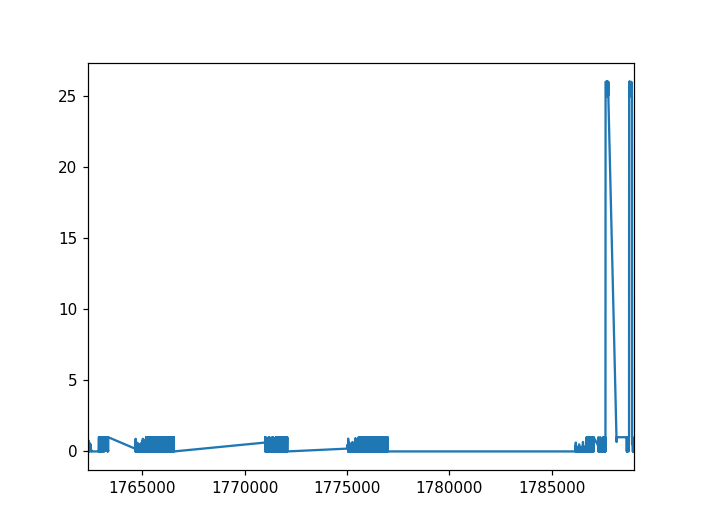

,session_fk,result
1787636,11132.0,26.0
1787637,11132.0,26.0
1787638,11132.0,26.0
1787639,11132.0,26.0
1787640,11132.0,26.0
1787641,11132.0,26.0
1787642,11132.0,26.0
1787643,11132.0,26.0
1787644,11132.0,26.0
1787645,11132.0,26.0


In [143]:

merged_kpi_results = static_kpi.merge(kpi_results, left_on='pk' ,right_on='kpi_level_2_fk', how='left')

# precent results should be between 0-1 
res = merged_kpi_results.loc[(merged_kpi_results['kpi_calculation_stage_fk'] == 3) & (merged_kpi_results['is_percent'] == 1 )]
res.result.plot()

print 
res[(res.result > 1) | (res.result < 0)][['session_fk','result']]

In [170]:
# % of results == 0 

res = merged_kpi_results.loc[(merged_kpi_results['kpi_calculation_stage_fk'] == 3)]
print " % results with 0 "
print  len(res[res.result == 0].pk_x) / float(len(res.pk_x))*100
res[(res.result == 0)][['session_fk','client_name','result']]


 % results with 0.0 
30.4629803187


,session_fk,client_name,result
1762391,12375.0,Total Score - Off Premise,0.0
1762392,12429.0,Total Score - Off Premise,0.0
1762394,12376.0,Total Score - Off Premise,0.0
1762401,13370.0,Total Score - Off Premise,0.0
1762402,12420.0,Total Score - Off Premise,0.0
1762487,12524.0,Total Score - Off Premise,0.0
1762510,12520.0,Total Score - Off Premise,0.0
1762513,11022.0,National Score - Off Premise,0.0
1762514,11022.0,National Score - Off Premise,0.0
1762515,11063.0,National Score - Off Premise,0.0


<IPython.core.display.Javascript object>


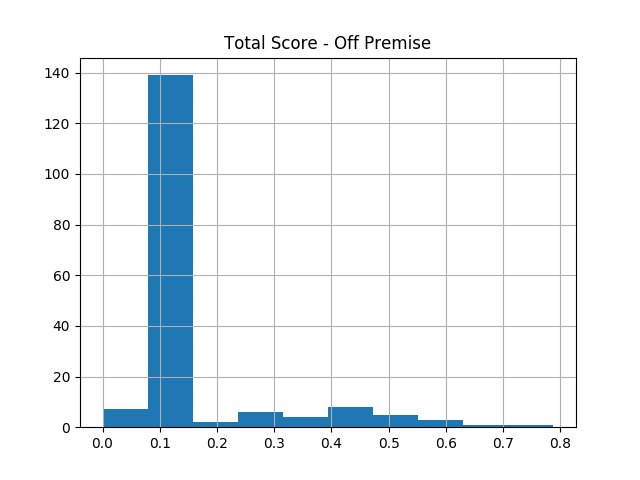

<IPython.core.display.Javascript object>


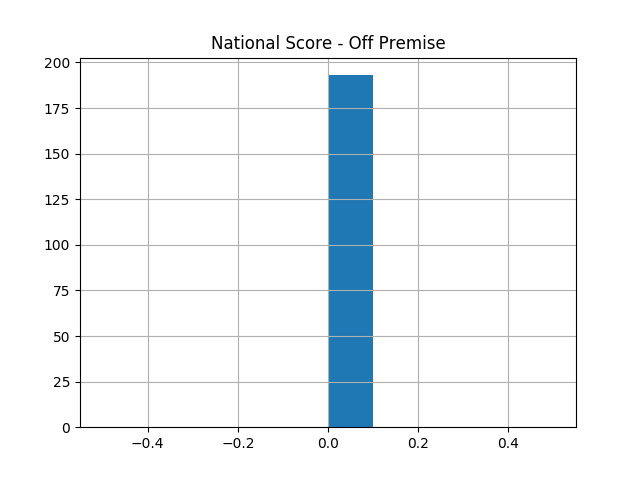

<IPython.core.display.Javascript object>


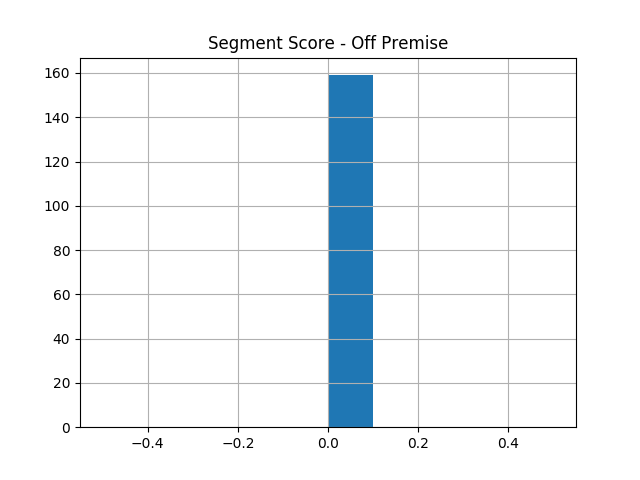

<IPython.core.display.Javascript object>


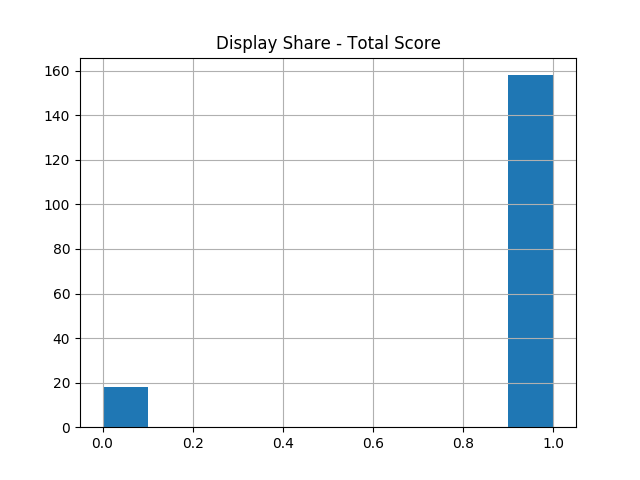

<IPython.core.display.Javascript object>


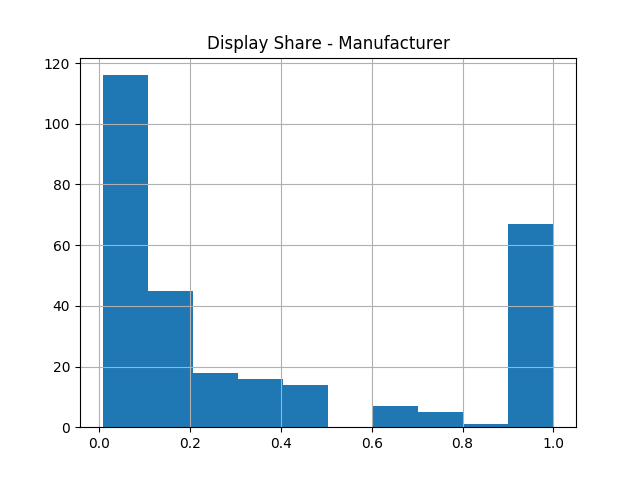

<IPython.core.display.Javascript object>


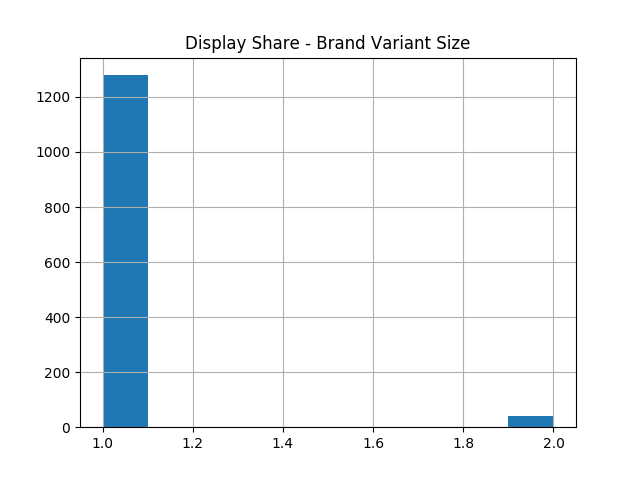

<IPython.core.display.Javascript object>


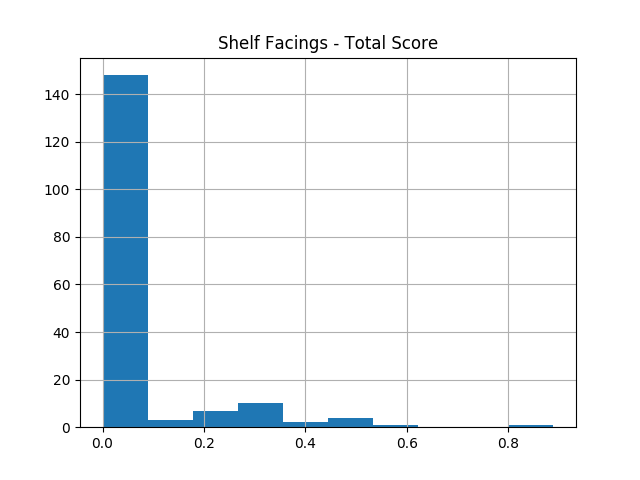

<IPython.core.display.Javascript object>


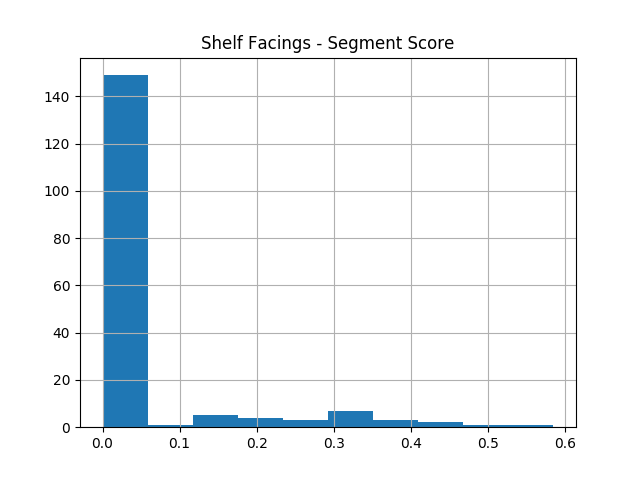

<IPython.core.display.Javascript object>


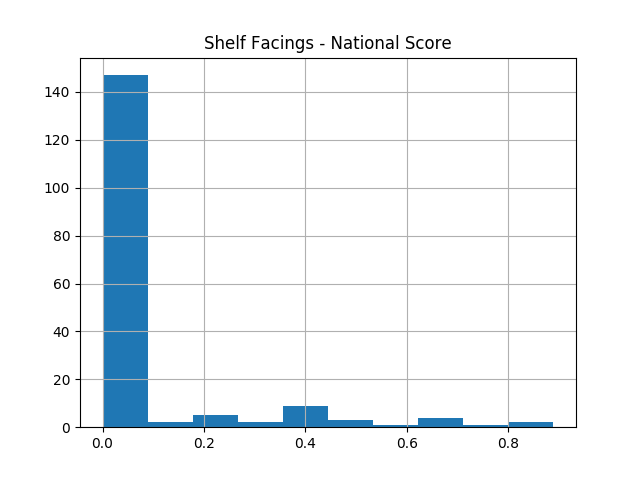

<IPython.core.display.Javascript object>


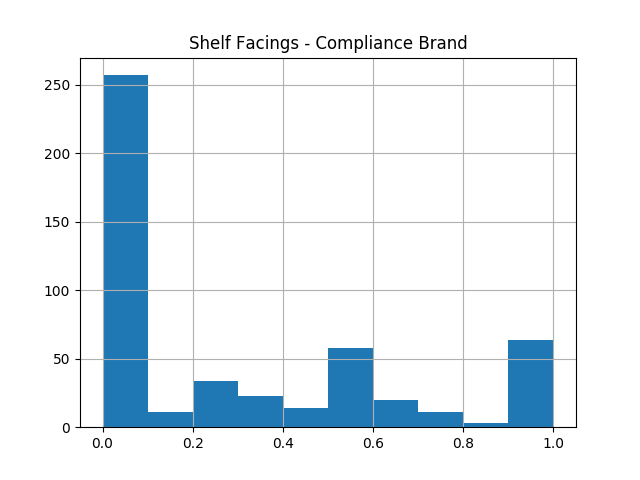

<IPython.core.display.Javascript object>


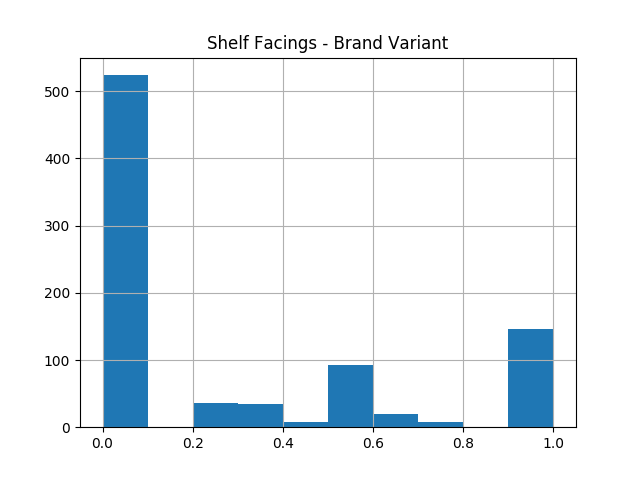

<IPython.core.display.Javascript object>


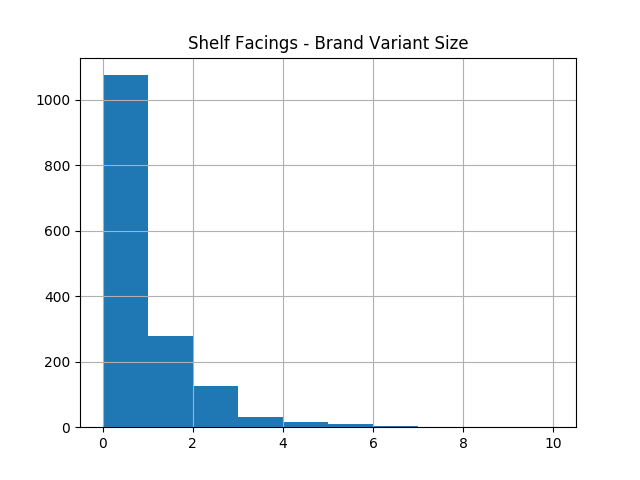

<IPython.core.display.Javascript object>


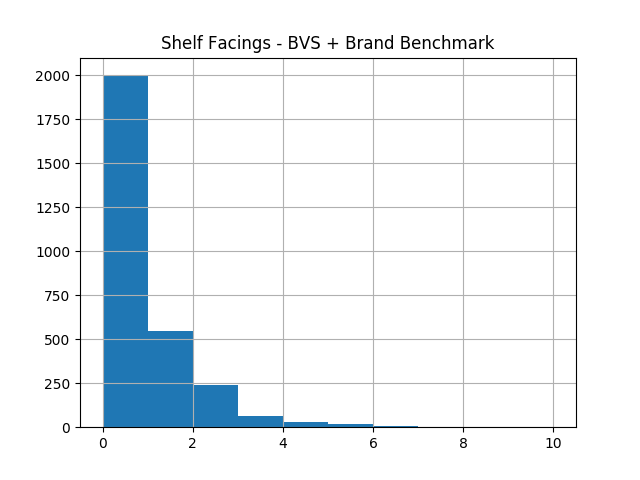

<IPython.core.display.Javascript object>


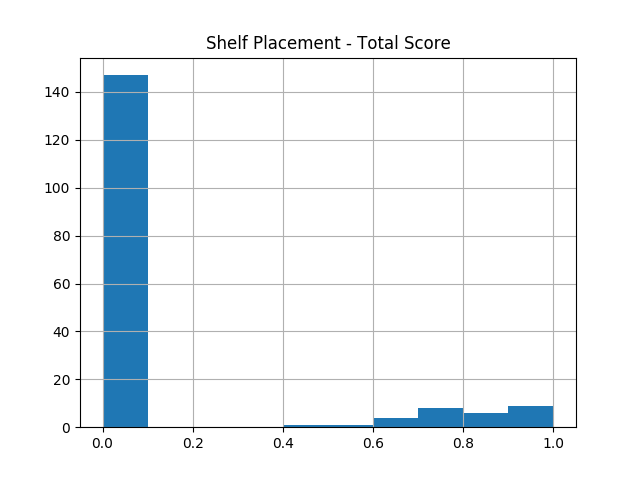

<IPython.core.display.Javascript object>


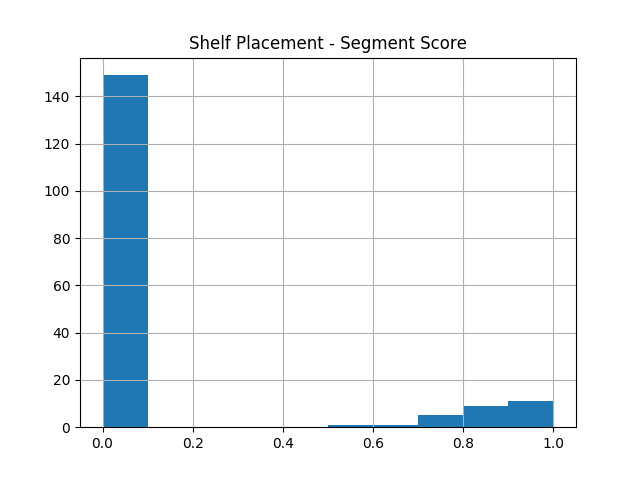

<IPython.core.display.Javascript object>


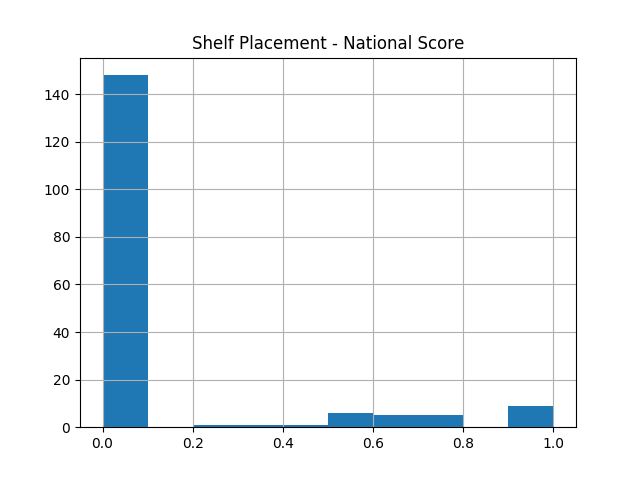

<IPython.core.display.Javascript object>


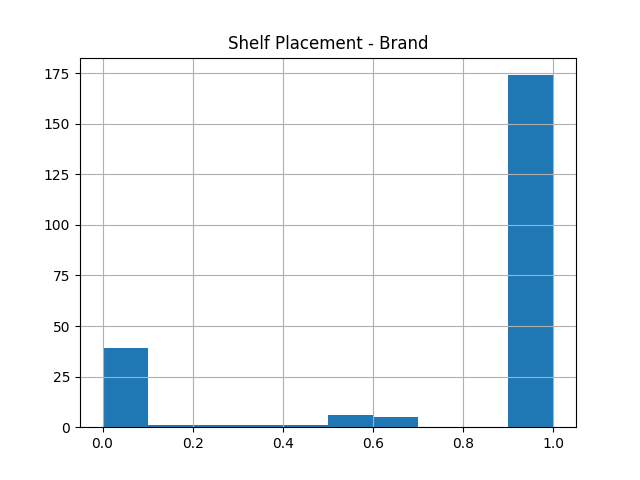

<IPython.core.display.Javascript object>


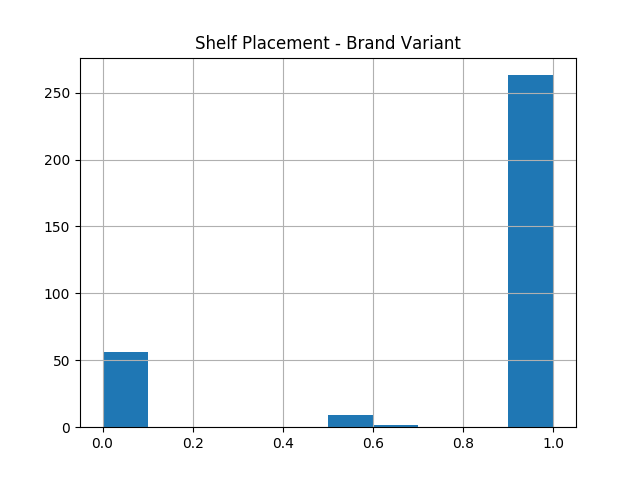

<IPython.core.display.Javascript object>


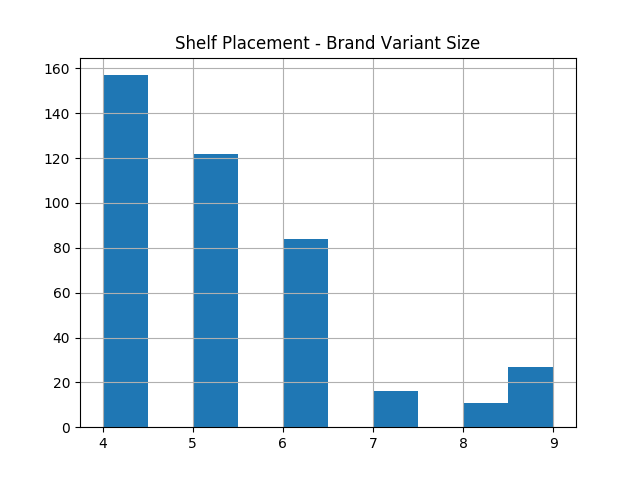

<IPython.core.display.Javascript object>


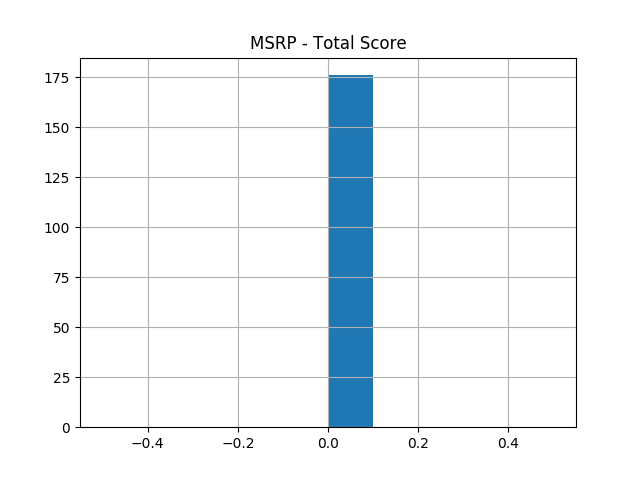

<IPython.core.display.Javascript object>


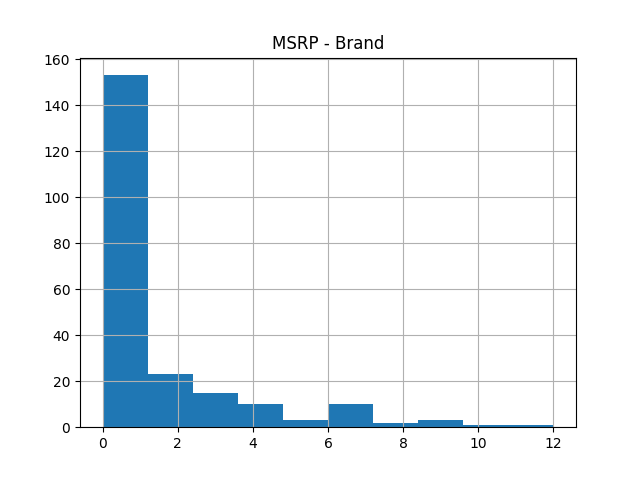

<IPython.core.display.Javascript object>


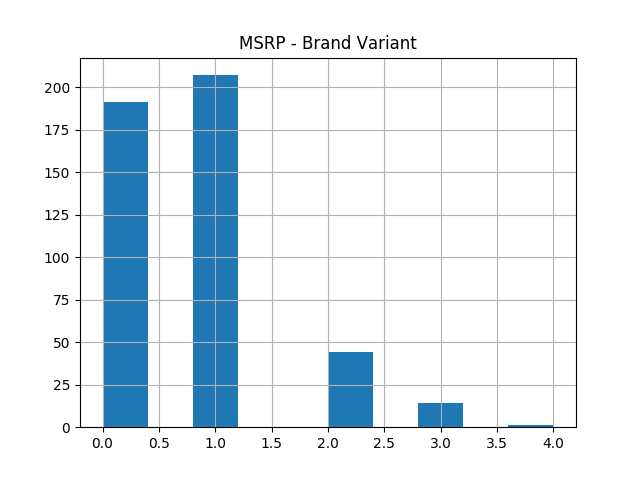

<IPython.core.display.Javascript object>


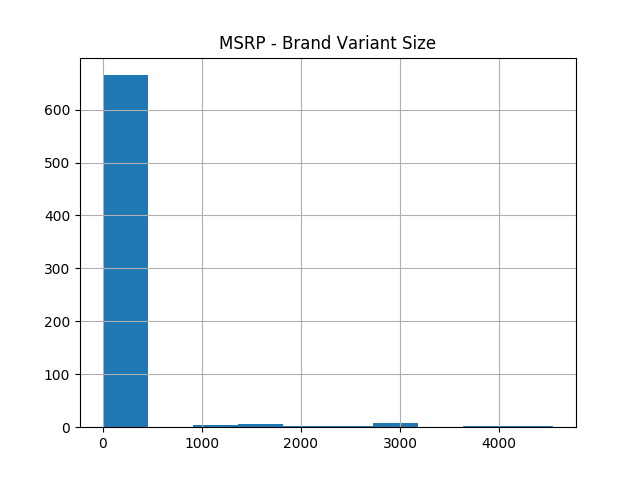

<IPython.core.display.Javascript object>


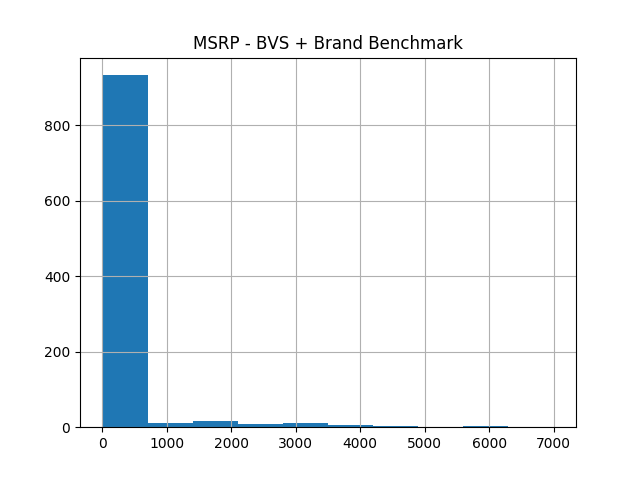

<IPython.core.display.Javascript object>


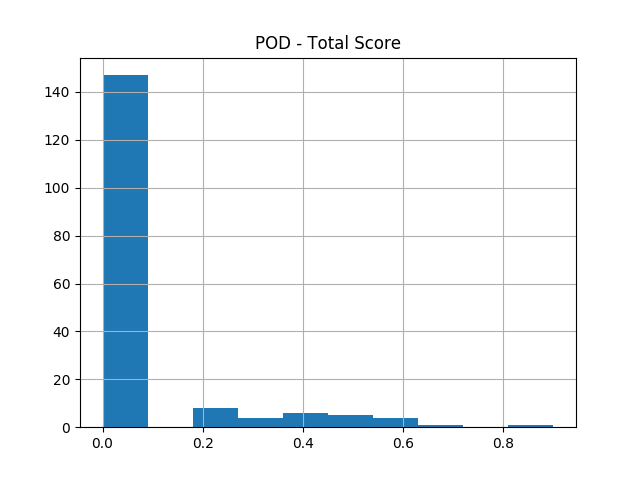

<IPython.core.display.Javascript object>


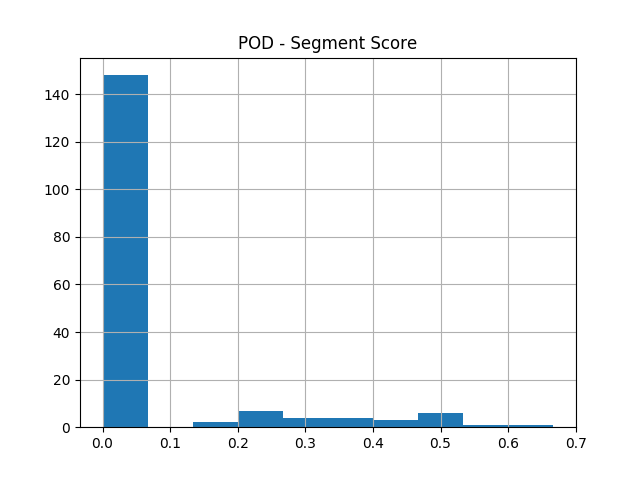

<IPython.core.display.Javascript object>


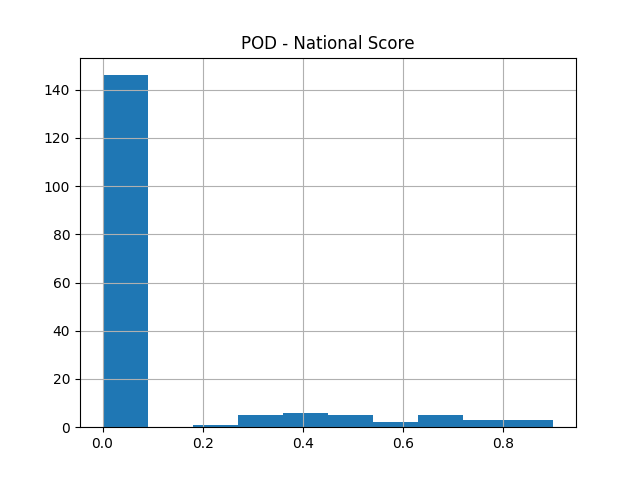

<IPython.core.display.Javascript object>


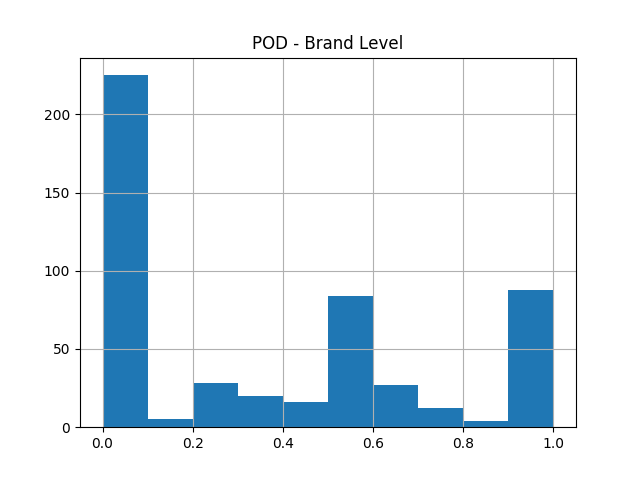

<IPython.core.display.Javascript object>


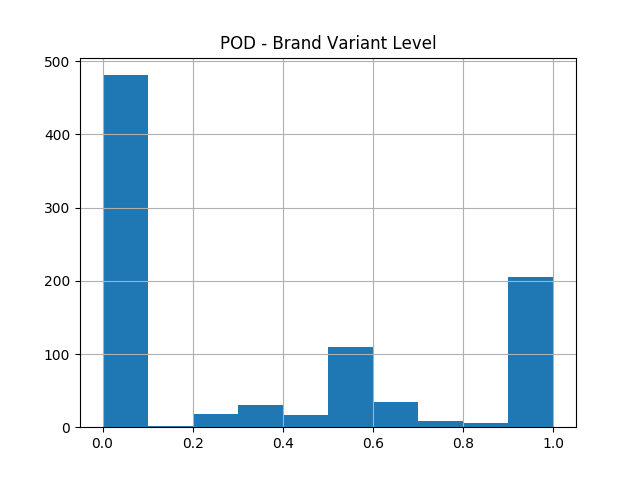

<IPython.core.display.Javascript object>


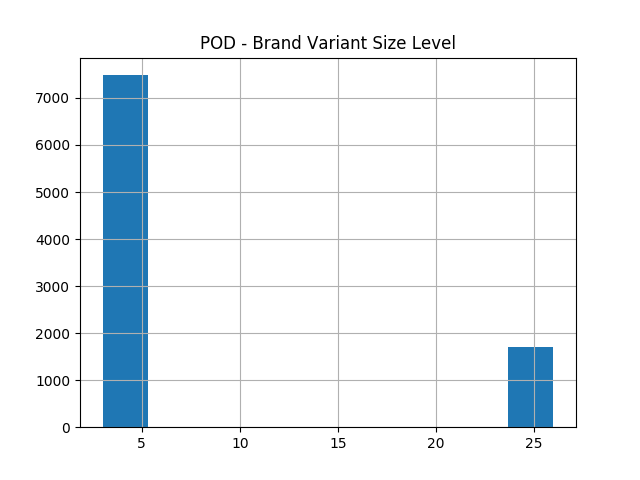

<IPython.core.display.Javascript object>


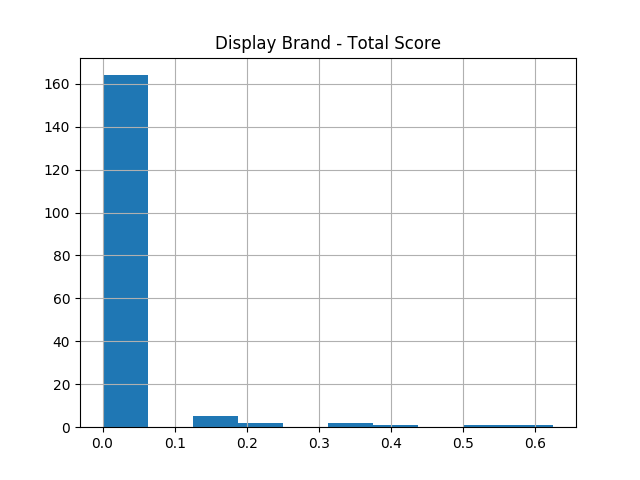

<IPython.core.display.Javascript object>


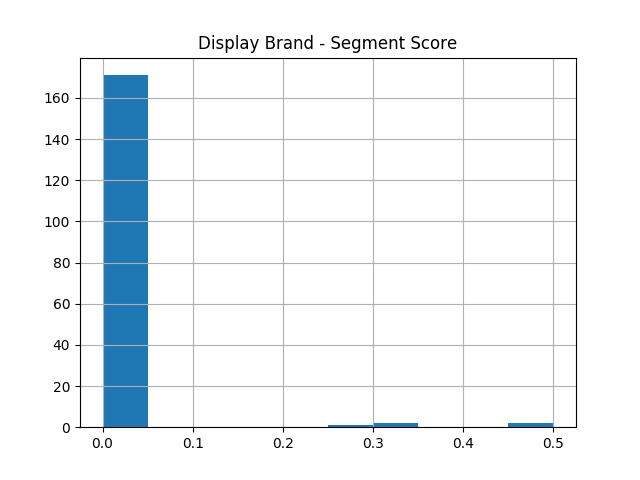

<IPython.core.display.Javascript object>


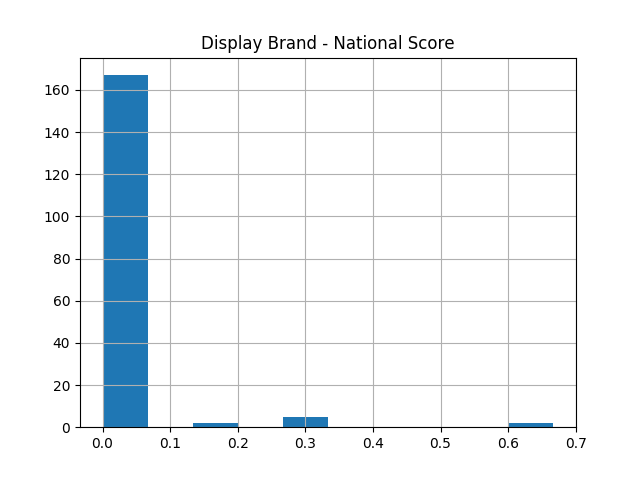

<IPython.core.display.Javascript object>


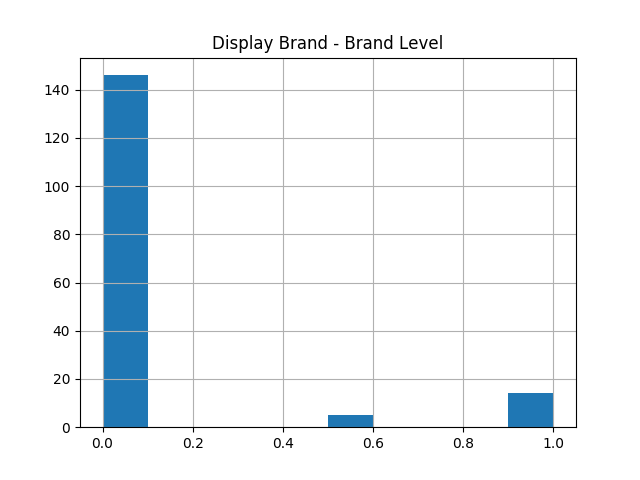

<IPython.core.display.Javascript object>


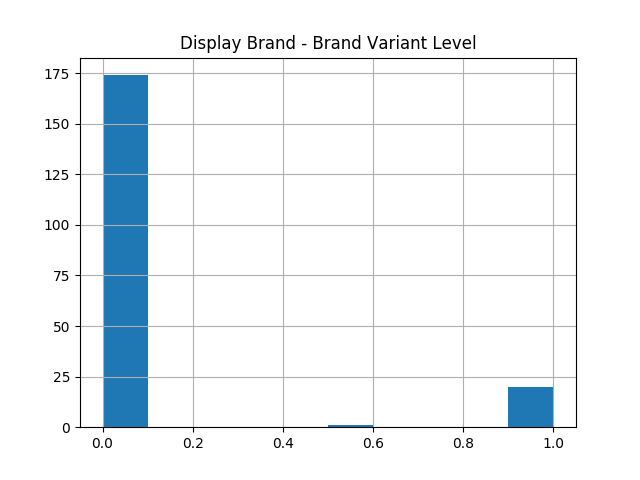

<IPython.core.display.Javascript object>


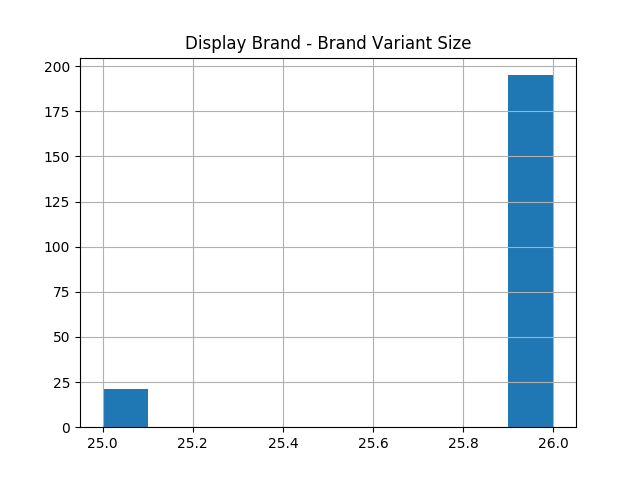

<IPython.core.display.Javascript object>


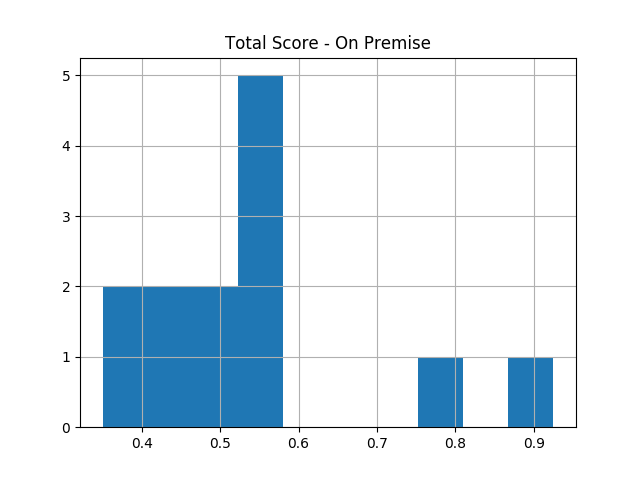

<IPython.core.display.Javascript object>


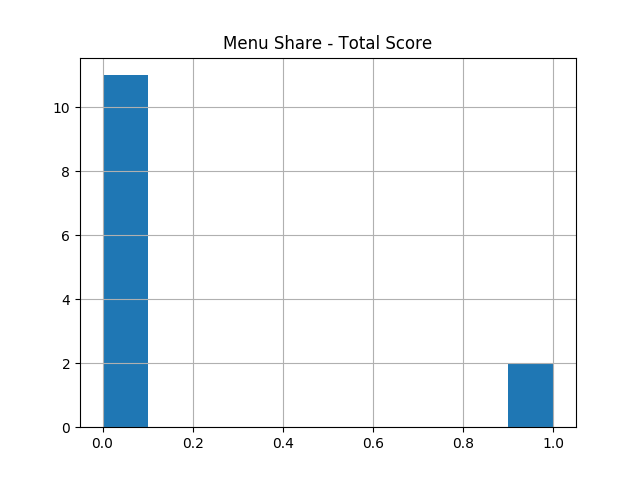

<IPython.core.display.Javascript object>


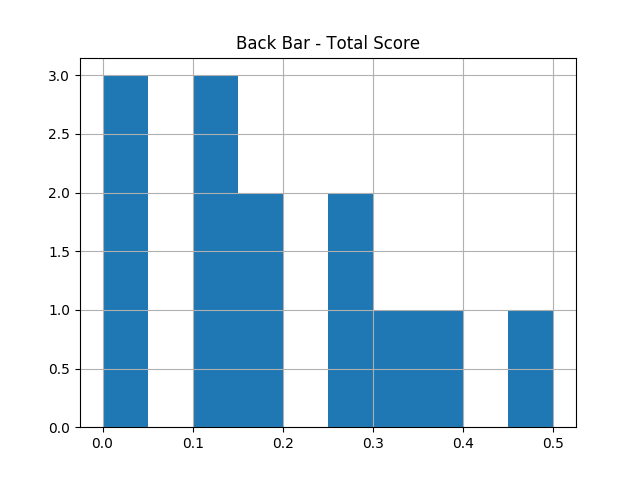

<IPython.core.display.Javascript object>


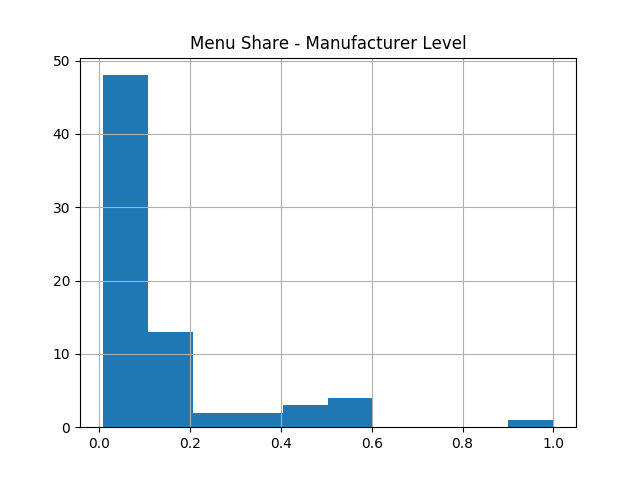

<IPython.core.display.Javascript object>


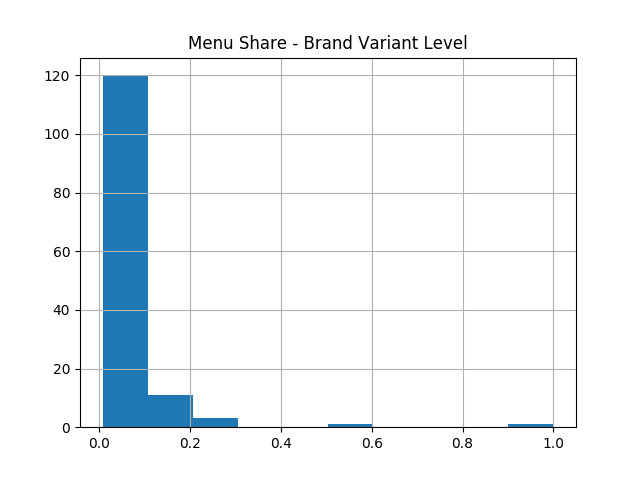

<IPython.core.display.Javascript object>


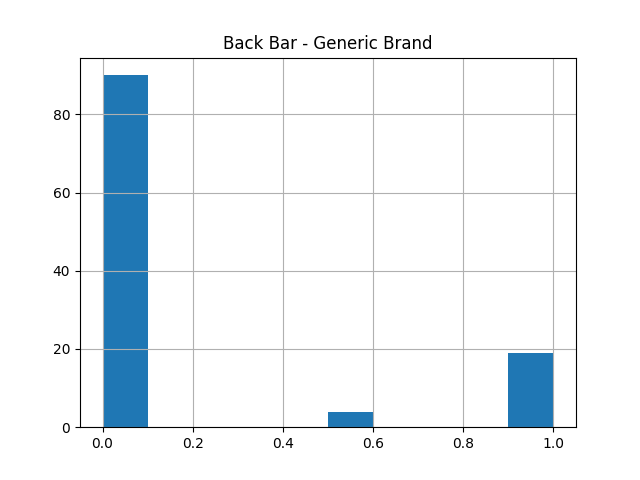

<IPython.core.display.Javascript object>


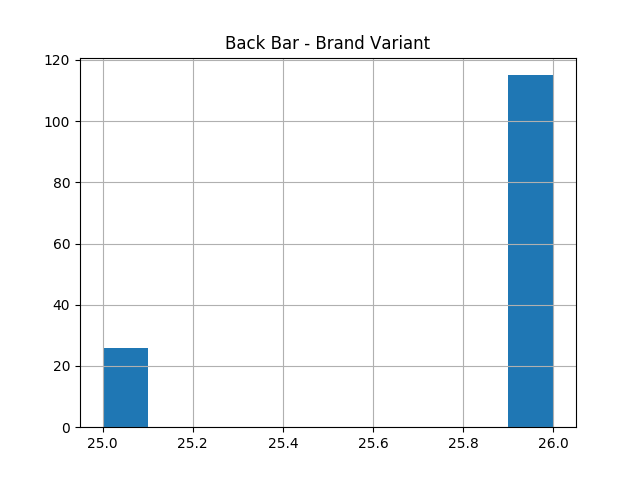

<IPython.core.display.Javascript object>


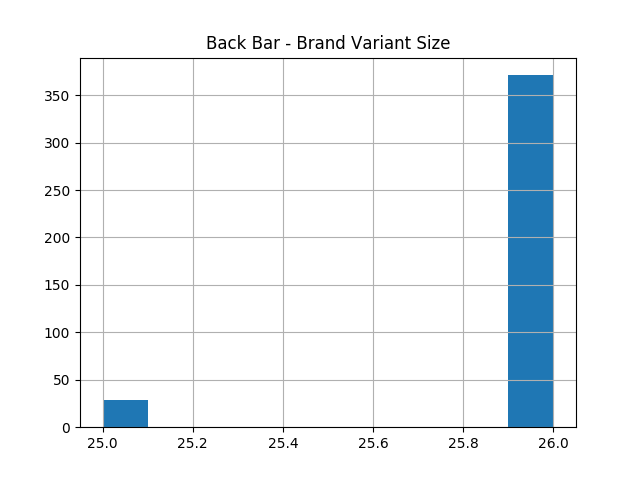

<IPython.core.display.Javascript object>


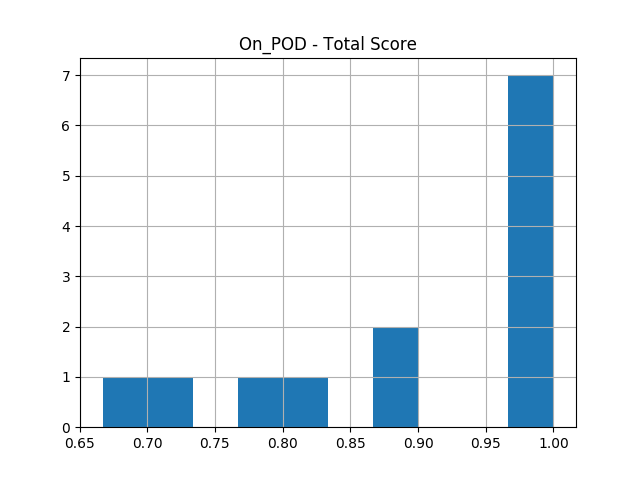

<IPython.core.display.Javascript object>


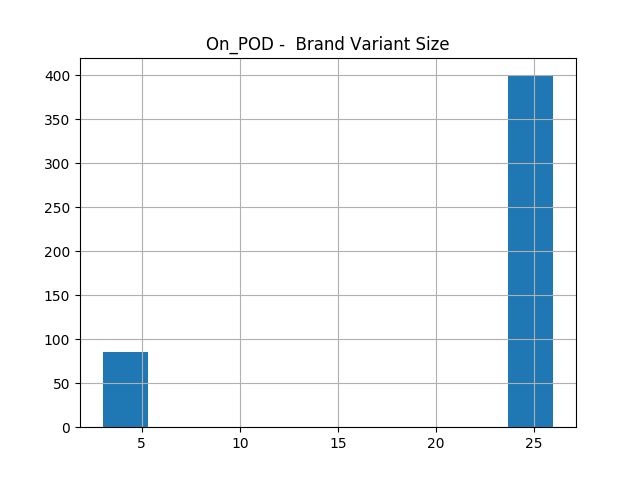

<IPython.core.display.Javascript object>


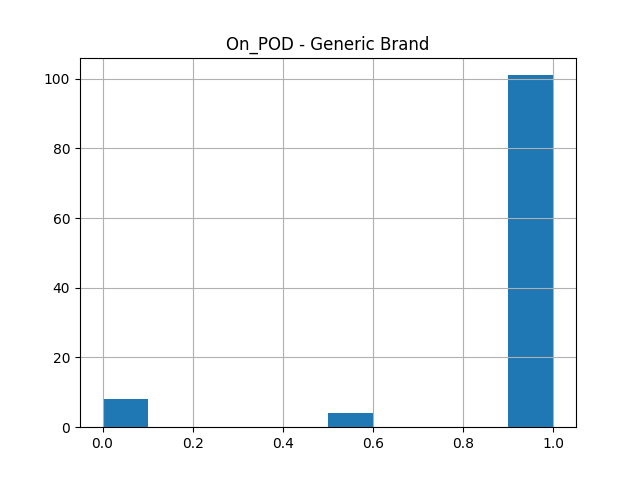

<IPython.core.display.Javascript object>


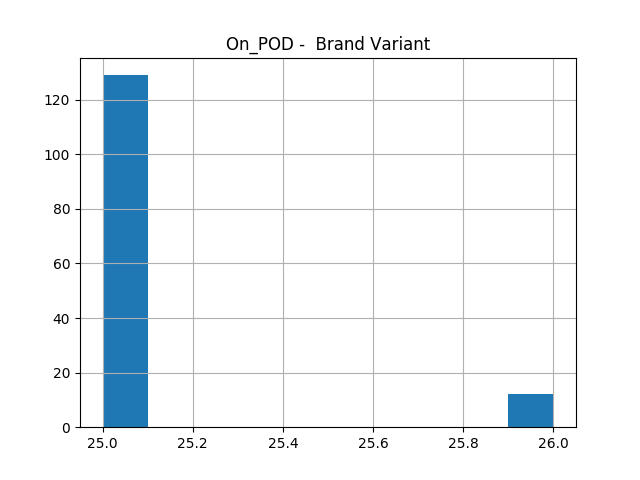

<IPython.core.display.Javascript object>


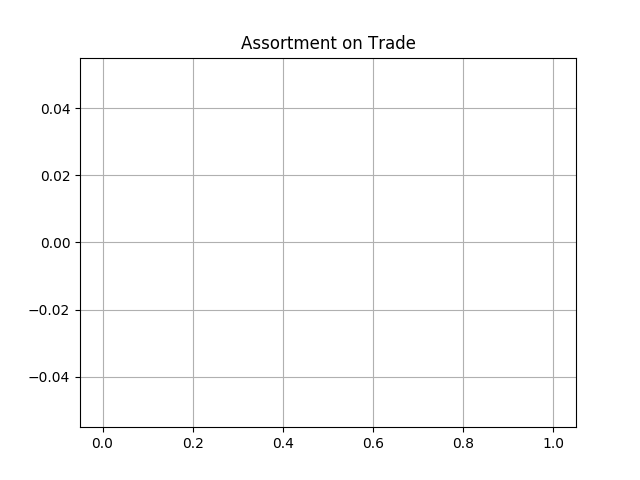

<IPython.core.display.Javascript object>


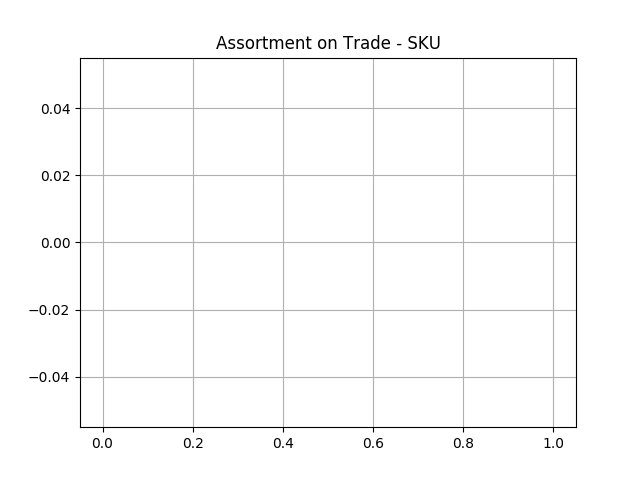

<IPython.core.display.Javascript object>


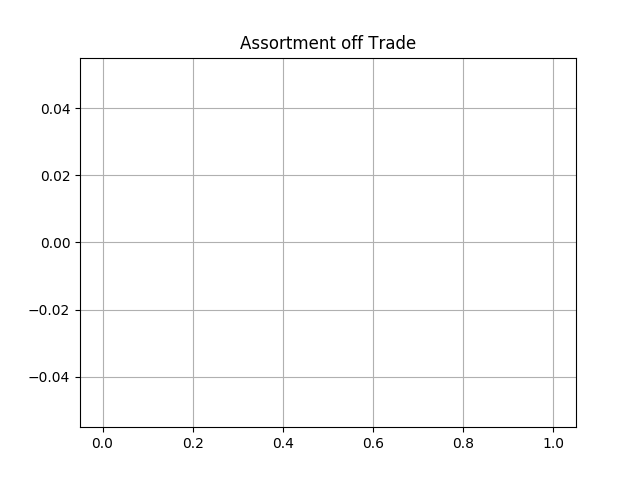

<IPython.core.display.Javascript object>


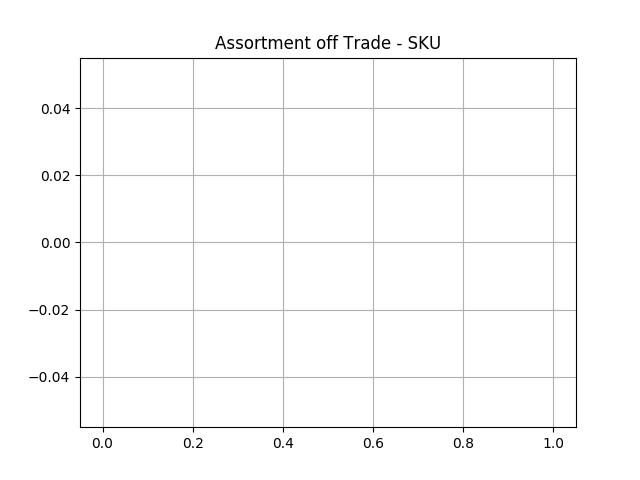

<IPython.core.display.Javascript object>


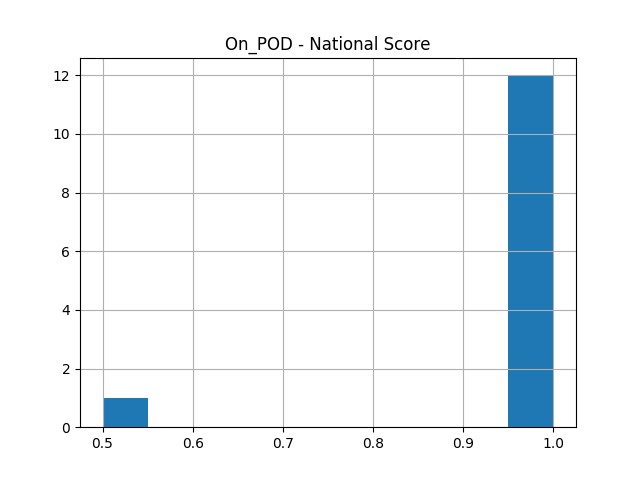

<IPython.core.display.Javascript object>


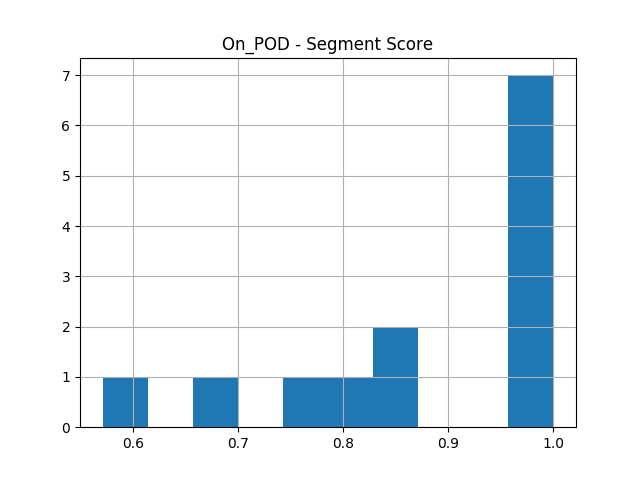

<IPython.core.display.Javascript object>


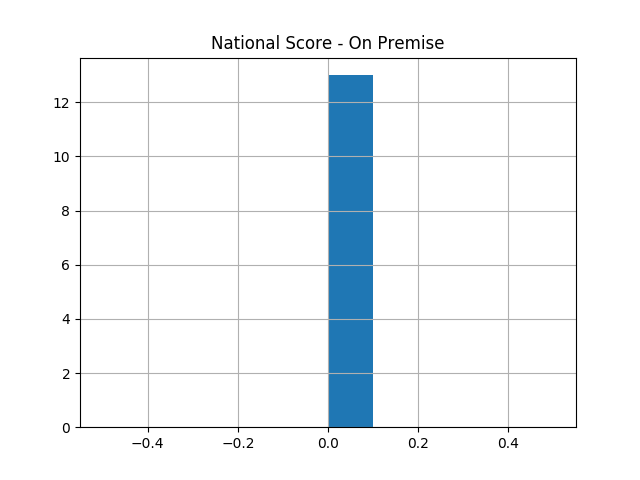

<IPython.core.display.Javascript object>


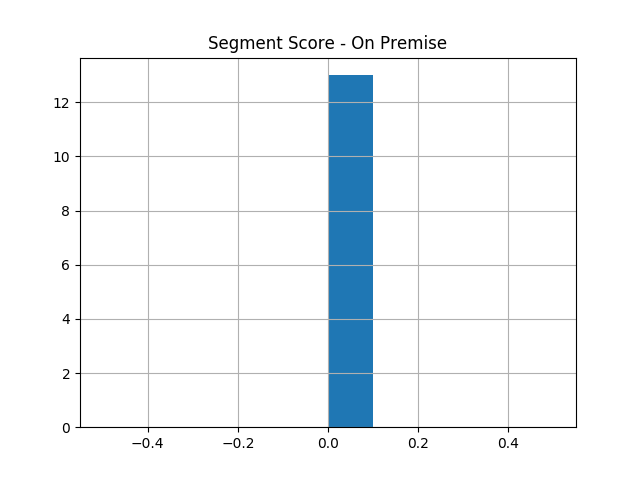

<IPython.core.display.Javascript object>


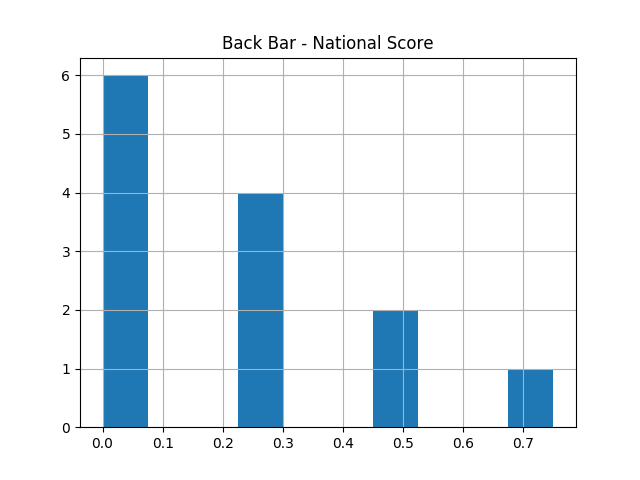

<IPython.core.display.Javascript object>


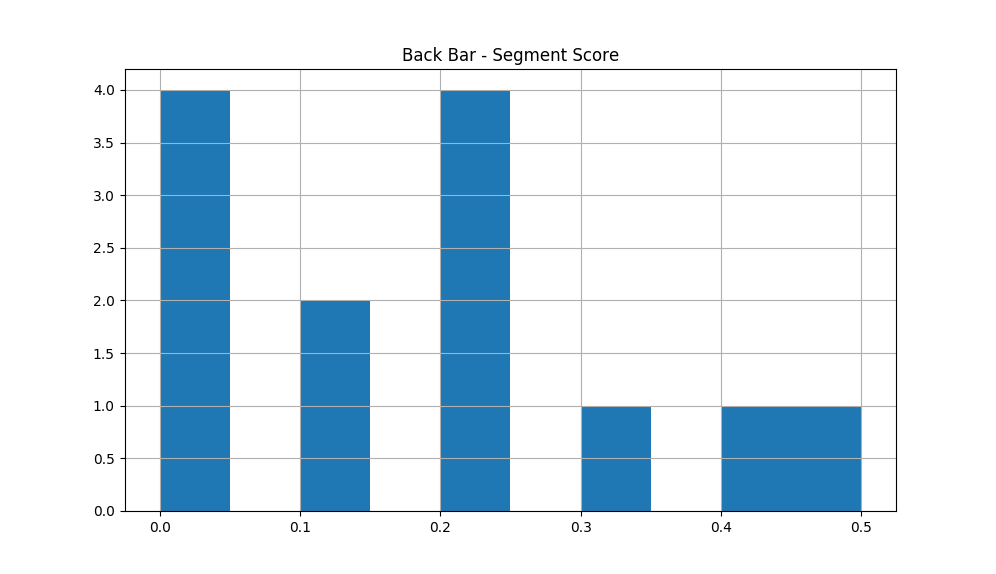

In [215]:
for i,row in static_kpi[static_kpi['kpi_calculation_stage_fk'] == 3].iterrows():   
    row['client_name']
    res = merged_kpi_results.loc[(merged_kpi_results['client_name'] == row['client_name'])]
    res[['client_name','result']].hist()
    plt.title(row['client_name'])
